In [18]:
# libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.linalg import svd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [19]:
# Read and preprocess the data
energy_data = pd.read_csv("NI_hourly.csv")
energy_data['Datetime'] = pd.to_datetime(energy_data['Datetime'])
energy_data['hour'] = energy_data['Datetime'].dt.hour
energy_data['date'] = energy_data['Datetime'].dt.date

# Sort chronologically by Datetime
energy_data = energy_data.sort_values('Datetime')

Data range: 2004-05-01 01:00:00 to 2011-01-01 00:00:00


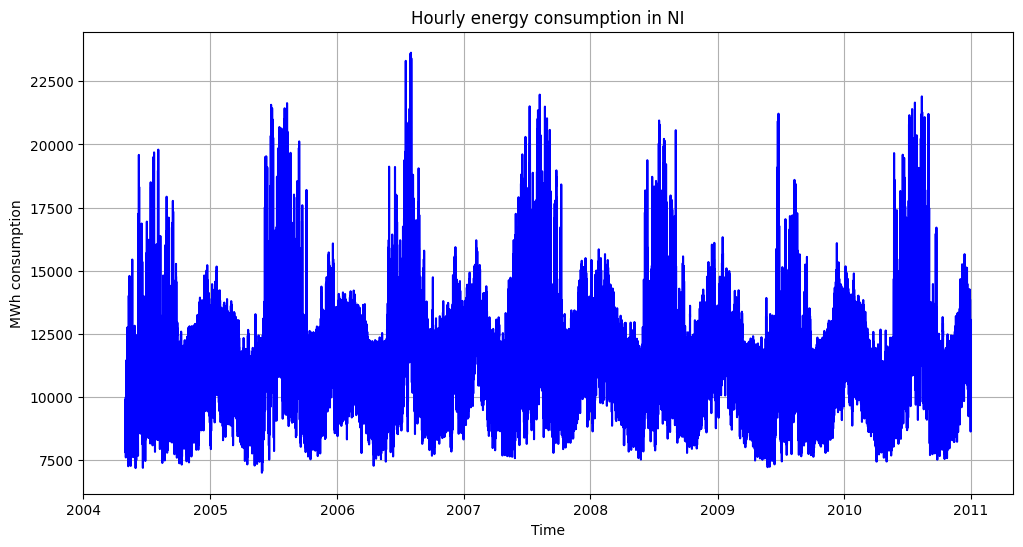

In [20]:
# Display data range
print(f"Data range: {energy_data['Datetime'].min()} to {energy_data['Datetime'].max()}")

# Plot hourly consumption
plt.figure(figsize=(12, 6))
plt.plot(energy_data['Datetime'], energy_data['NI_MW'], color='blue')
plt.xlabel('Time')
plt.ylabel('MWh consumption')
plt.title('Hourly energy consumption in NI')
plt.grid(True)
plt.show()

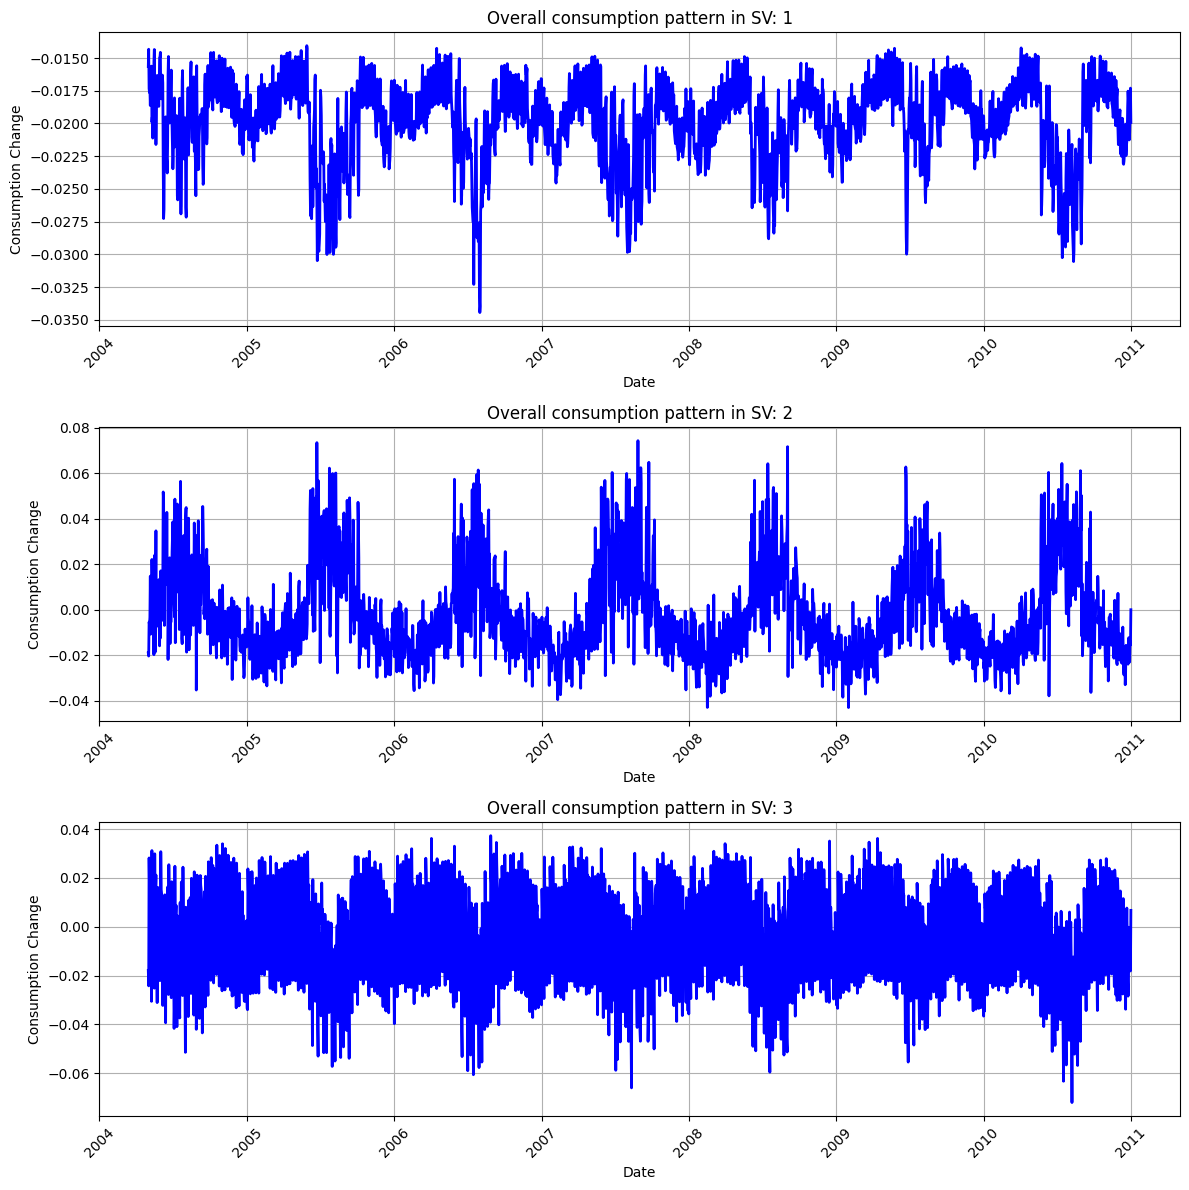

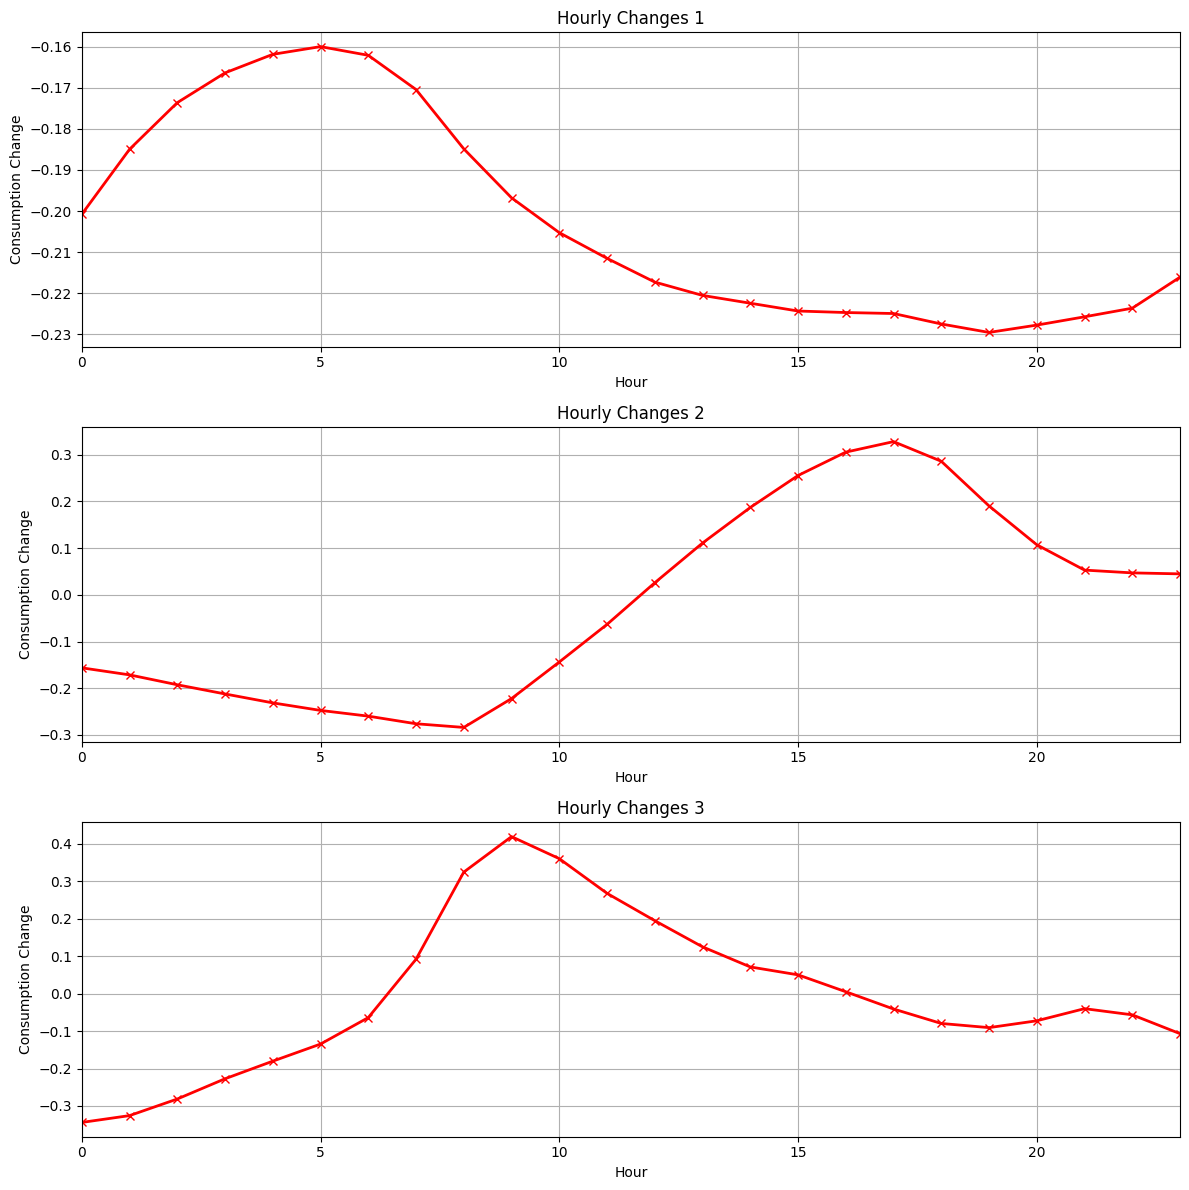

In [21]:
# Create pivot table for SVD analysis
pivoted_data = energy_data.pivot_table(
    values='NI_MW', 
    index='date',
    columns='hour',
    aggfunc='mean'
)
pivoted_data = pivoted_data.fillna(pivoted_data.mean())
matrix = pivoted_data.values

# Perform SVD
U, S, Vt = svd(matrix, full_matrices=False)
V = Vt.T

# Plot overall consumption patterns from SVD
plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(pivoted_data.index, U[:, i], linewidth=2, color='blue')
    plt.title(f'Overall consumption pattern in SV: {i+1}')
    plt.xlabel('Date')
    plt.ylabel('Consumption Change')
    plt.grid(True)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot hourly patterns from SVD
plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(range(24), V[:, i], 'rx-', linewidth=2)
    plt.title(f'Hourly Changes {i+1}')
    plt.xlabel('Hour')
    plt.ylabel('Consumption Change')
    plt.xlim(0, 23)
    plt.grid(True)
plt.tight_layout()
plt.show()

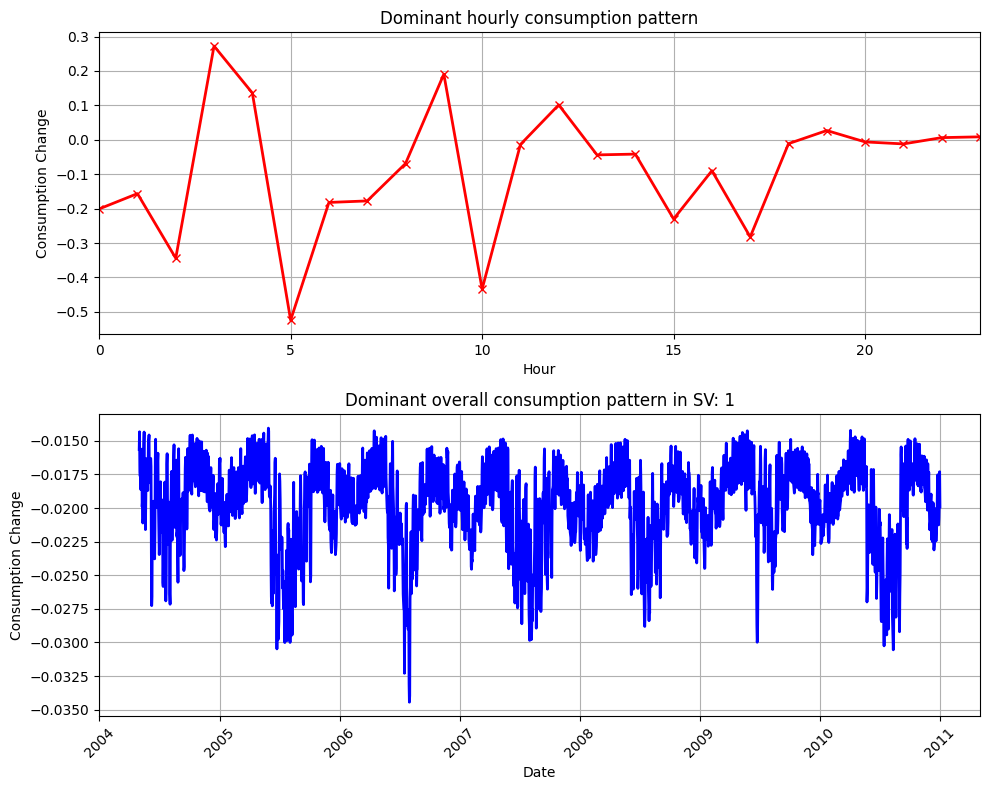

In [22]:
# Create figure with 2 subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# First subplot
hours = np.arange(24)  # 0:23
ax1.plot(hours, V[0, :], 'rx-', linewidth=2)
ax1.set_title('Dominant hourly consumption pattern')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Consumption Change')
ax1.set_xlim([0, 23])
ax1.grid(True)

# Second subplot
ax2.plot(pivoted_data.index, U[:, 0], linewidth=2, color='blue')  # Fixed this line
ax2.set_title(f'Dominant overall consumption pattern in SV: {1}')
ax2.set_xlabel('Date')
ax2.set_ylabel('Consumption Change')
plt.setp(ax2.xaxis.get_ticklabels(), rotation=45)
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

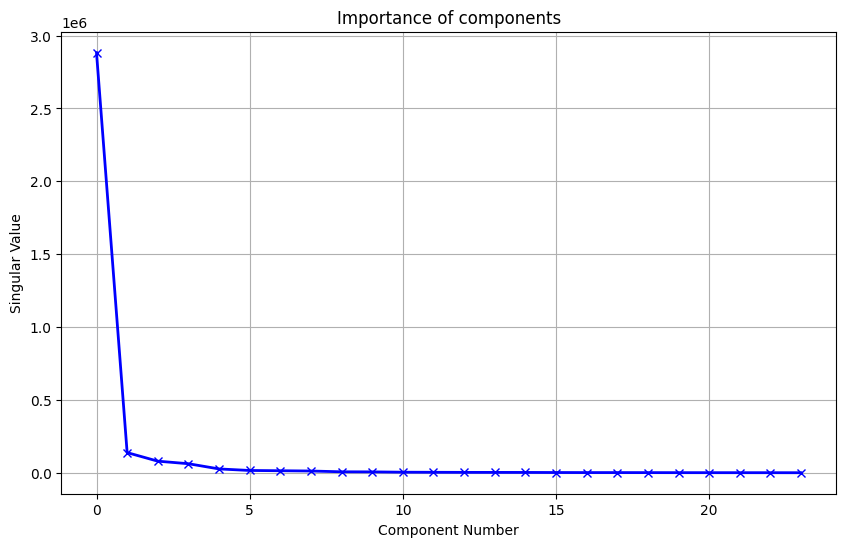

In [23]:
# Plot singular values
plt.figure(figsize=(10, 6))
plt.plot(S, 'bx-', linewidth=2)
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.title('Importance of components')
plt.grid(True)
plt.show()

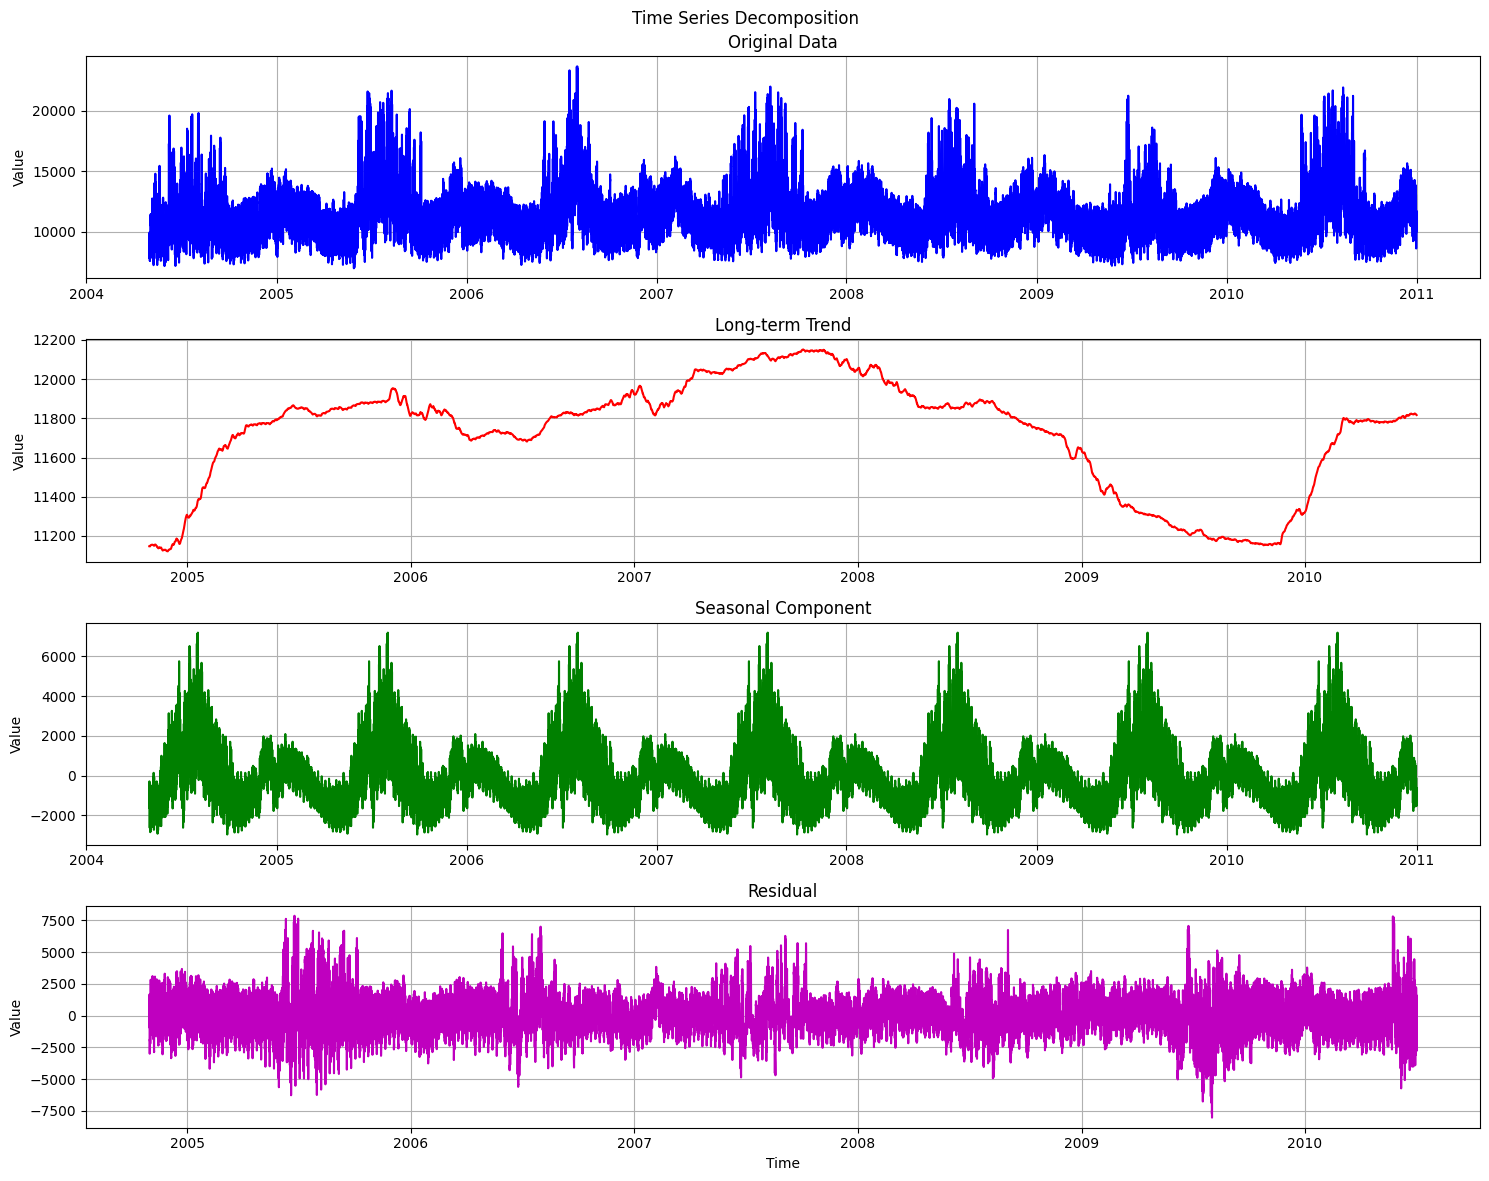

In [24]:
# Time series decomposition
ts_data = pd.Series(
    energy_data['NI_MW'].values,
    index=pd.DatetimeIndex(energy_data['Datetime']),
    name='NI_MW'
)
ts_data = ts_data.sort_index()

# Perform decomposition
decomposition = seasonal_decompose(
    ts_data,
    model="additive",
    period=24*365, # yearly seasonality
    extrapolate_trend=0
)

# Plot decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Original Data
ax1.plot(ts_data.index, ts_data.values, 'b-', linewidth=1.5)
ax1.set_title('Original Data')
ax1.grid(True)
ax1.set_ylabel('Value')

# Trend
ax2.plot(ts_data.index, decomposition.trend, 'r-', linewidth=1.5)
ax2.set_title('Long-term Trend')
ax2.grid(True)
ax2.set_ylabel('Value')

# Seasonal
ax3.plot(ts_data.index, decomposition.seasonal, 'g-', linewidth=1.5)
ax3.set_title('Seasonal Component')
ax3.grid(True)
ax3.set_ylabel('Value')

# Residual
ax4.plot(ts_data.index, decomposition.resid, 'm-', linewidth=1.5)
ax4.set_title('Residual')
ax4.grid(True)
ax4.set_xlabel('Time')
ax4.set_ylabel('Value')

# Adjust layout for decomposition plot
plt.suptitle('Time Series Decomposition')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

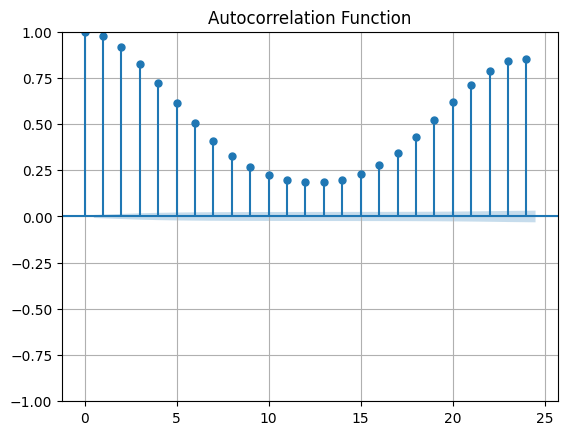

In [ ]:
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(energy_data['NI_MW'], lags=24)
plt.grid(True)
plt.title('Autocorrelation Function')
plt.show()